In [1]:
import numpy as np
import pandas as pd
import os
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [2]:
transform = transforms.Compose([
    transforms.ToTensor()
])

train_dataset = datasets.FashionMNIST(root="./data", train=True, download=True, transform=transform)
test_dataset = datasets.FashionMNIST(root="./data", train=False, download=True, transform=transform)

train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=64, shuffle=False)

100%|██████████| 26.4M/26.4M [00:02<00:00, 9.16MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 142kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 2.66MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 10.8MB/s]


In [3]:
class FashionMNISTModel(nn.Module):
    def __init__(self):
        super(FashionMNISTModel, self).__init__()
        self.flatten = nn.Flatten()
        self.linear = nn.Sequential(
            # 28 * 28 = the size of the image has height 28 and width 28
            # It's flattened to be used as input for the neural network
            # 128 is the number of neurons in this first layer
            nn.Linear(28 * 28, 128),
            nn.ReLU(),
            # Receive data in the 128 format and output 10 (10 classes)
            nn.Linear(128, 10),
            # The class with highest probability will have value 1 and the other ones will have value 0
            nn.LogSoftmax(dim=1)
        )

    def forward(self, x):
        logits = self.linear(self.flatten(x))
        return logits

In [4]:
model = FashionMNISTModel()
loss_function = nn.NLLLoss()
optimizer = optim.Adam(model.parameters())

In [5]:
def get_accuracy(pred, labels):
    _, predictions = torch.max(pred, 1)
    correct = predictions.eq(labels).float().sum()
    accuracy = correct / labels.shape[0]
    return accuracy

In [6]:
def train(dataloader, model, loss_function, optimizer):
    size = len(dataloader.dataset)
    total_loss, total_accuracy = 0, 0
    model.train()
    
    for batch, (x, y) in enumerate(dataloader):
        optimizer.zero_grad()
        logits = model(x)
        loss = loss_function(logits, y)
        loss.backward()
        optimizer.step()
        accuracy = get_accuracy(logits, y)
        total_accuracy += accuracy.item()
        total_loss += loss.item()

        if batch % 100 == 0:
            avg_loss = total_loss / (batch + 1)
            avg_accuracy = total_accuracy / (batch + 1) * 100.0
            print(f"Batch {batch}, Loss: {avg_loss:>7f}, Accuracy: {avg_accuracy:>0.2f}%  [{(batch * len(x)):>5d}/{size:>5d}]")

In [7]:
epochs = 5

for epoch in range(epochs):
    print(f"Epoch {epoch+1}\n-------------------------------")
    train(train_dataloader, model, loss_function, optimizer)
    print("===============================")

print("Done!")

Epoch 1
-------------------------------
Batch 0, Loss: 2.345083, Accuracy: 7.81%  [    0/60000]
Batch 100, Loss: 1.013457, Accuracy: 66.35%  [ 6400/60000]
Batch 200, Loss: 0.806364, Accuracy: 72.89%  [12800/60000]
Batch 300, Loss: 0.723735, Accuracy: 75.52%  [19200/60000]
Batch 400, Loss: 0.673620, Accuracy: 77.16%  [25600/60000]
Batch 500, Loss: 0.641341, Accuracy: 78.19%  [32000/60000]
Batch 600, Loss: 0.612118, Accuracy: 79.10%  [38400/60000]
Batch 700, Loss: 0.591140, Accuracy: 79.74%  [44800/60000]
Batch 800, Loss: 0.573604, Accuracy: 80.30%  [51200/60000]
Batch 900, Loss: 0.560649, Accuracy: 80.72%  [57600/60000]
Epoch 2
-------------------------------
Batch 0, Loss: 0.441866, Accuracy: 82.81%  [    0/60000]
Batch 100, Loss: 0.419263, Accuracy: 85.15%  [ 6400/60000]
Batch 200, Loss: 0.413687, Accuracy: 85.39%  [12800/60000]
Batch 300, Loss: 0.415462, Accuracy: 85.34%  [19200/60000]
Batch 400, Loss: 0.417411, Accuracy: 85.25%  [25600/60000]
Batch 500, Loss: 0.414429, Accuracy: 85.

In [8]:
def test(dataloader, model, loss_function):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0
    model.eval()

    with torch.no_grad():
        for batch, (x, y) in enumerate(dataloader):
            logits = model(x)
            loss = loss_function(logits, y)
            test_loss += loss.item()
            correct += (logits.argmax(1) == y).sum().item()

    test_loss /= num_batches
    correct /= size
    print("Test Error:")
    print(f"Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f}")

In [9]:
test(test_dataloader, model, loss_function)

Test Error:
Accuracy: 86.9%, Avg loss: 0.370534


### Predicting one image

In [10]:
image, label = test_dataset[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

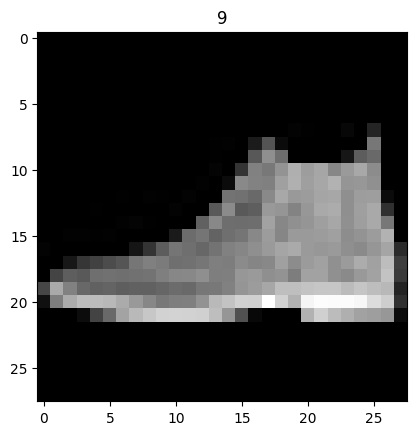

In [11]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(label)
plt.show()

In [12]:
prediction = model(image)
prediction

tensor([[-11.3903, -15.1645, -12.8478, -11.1462, -11.4834,  -4.6090,  -9.3649,
          -1.6242,  -9.3357,  -0.2322]], grad_fn=<LogSoftmaxBackward0>)

In [13]:
f"The model predicted {prediction.argmax(1).item()}, and the actual label is {label}."

'The model predicted 9, and the actual label is 9.'